# Loan Prediction

In [1]:
#import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Read CSV

In [2]:
#https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset

loan_prediction = pd.read_csv('/Users/adityaradhakrishnan/Desktop/CodeClause/Loan Prediction Problem/Loan Prediction Problem Dataset/train_u6lujuX_CVtuZ9i.csv')

In [3]:
loan_prediction.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
loan_prediction.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
loan_prediction.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#Filling null values


#replacing null values in Gender, Married, Self Employed, Dependents, Credit history and Loan Amount Term with mode
loan_prediction['Gender'].fillna(loan_prediction['Gender'].mode()[0],inplace=True)
loan_prediction['Married'].fillna(loan_prediction['Married'].mode()[0],inplace=True)
loan_prediction['Self_Employed'].fillna(loan_prediction['Self_Employed'].mode()[0],inplace=True)
loan_prediction['Dependents'].fillna(loan_prediction['Dependents'].mode()[0],inplace=True)
loan_prediction['Credit_History'].fillna(loan_prediction['Credit_History'].mode()[0],inplace=True)
loan_prediction['Loan_Amount_Term'].fillna(loan_prediction['Loan_Amount_Term'].mode()[0],inplace=True)

#replacing null values in LoanAmount with mean
loan_prediction['LoanAmount'].fillna(loan_prediction['LoanAmount'].mean(),inplace=True)

In [7]:
loan_prediction.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
loan_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Exploratory Data Analysis

<AxesSubplot:>

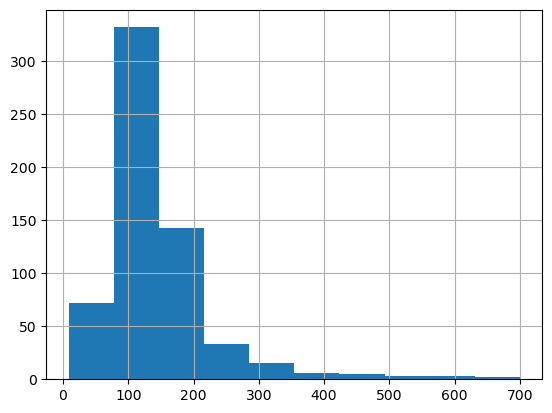

In [9]:
loan_prediction['LoanAmount'].hist()

Loan Applicants Segmented by Gender
Male      502
Female    112
Name: Gender, dtype: int64


[Text(0.5, 1.0, 'Loan Recipients Applicants by Gender')]

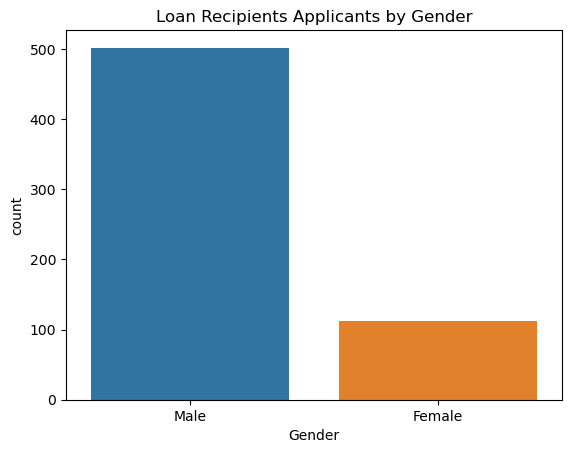

In [10]:
print('Loan Applicants Segmented by Gender')
print(loan_prediction['Gender'].value_counts())

sns.countplot(x='Gender',data=loan_prediction).set(title='Loan Recipients Applicants by Gender')

Loan Applicants Segmented by Marital Status
Yes    401
No     213
Name: Married, dtype: int64


[Text(0.5, 1.0, 'Loan Applicants Segmented by Marital Status')]

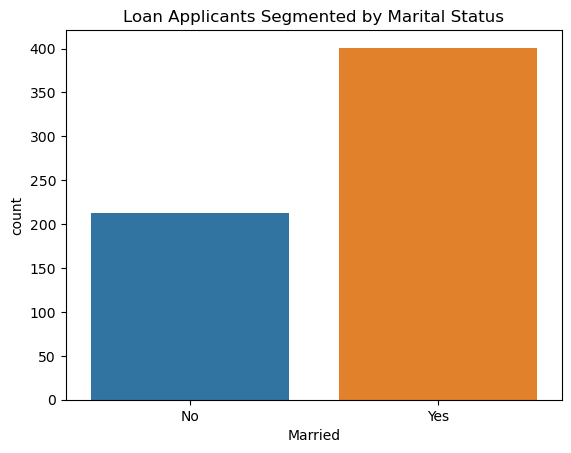

In [11]:
print('Loan Applicants Segmented by Marital Status')
print(loan_prediction['Married'].value_counts())

sns.countplot(x='Married',data=loan_prediction).set(title='Loan Applicants Segmented by Marital Status')

Loan Applicants Segmented by Number of Dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


[Text(0.5, 1.0, 'Loan Applicants Segmented by Number of Dependents')]

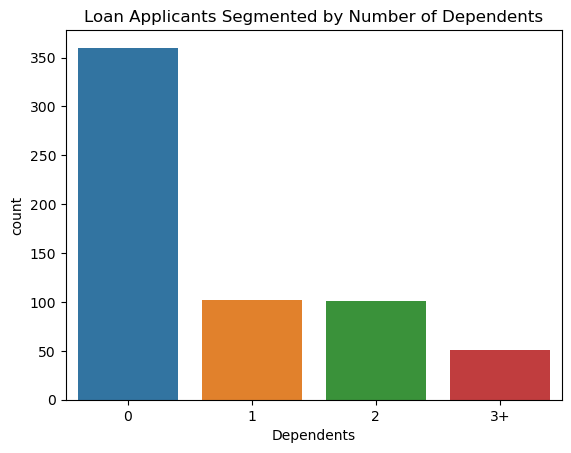

In [12]:
print('Loan Applicants Segmented by Number of Dependents')
print(loan_prediction['Dependents'].value_counts())

sns.countplot(x='Dependents',data=loan_prediction).set(title='Loan Applicants Segmented by Number of Dependents')

Loan Applicants Segmented by Rural and Urban Areas
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


[Text(0.5, 1.0, 'Loan Applicants Segmented by Rural and Urban Areas')]

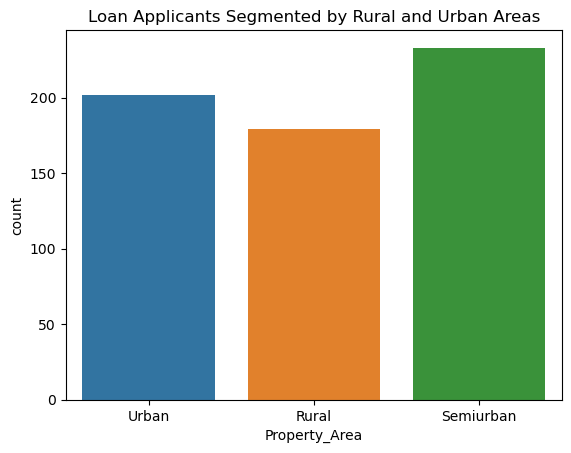

In [13]:
print('Loan Applicants Segmented by Rural and Urban Areas')
print(loan_prediction['Property_Area'].value_counts())

sns.countplot(x='Property_Area',data=loan_prediction).set(title='Loan Applicants Segmented by Rural and Urban Areas')

Loan Applicants Segmented by Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


[Text(0.5, 1.0, 'Loan Applicants Segmented by Education')]

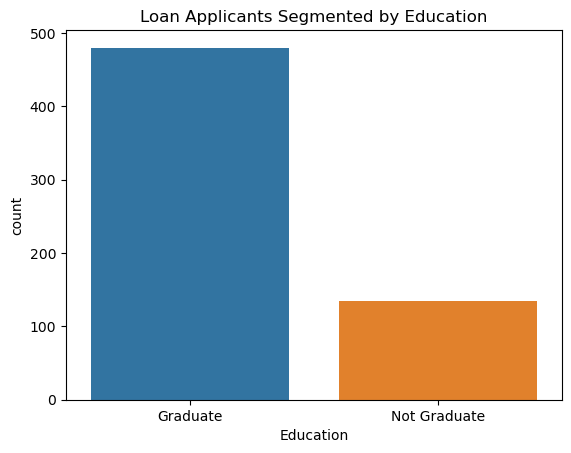

In [14]:
print('Loan Applicants Segmented by Education')
print(loan_prediction['Education'].value_counts())

sns.countplot(x='Education',data=loan_prediction).set(title='Loan Applicants Segmented by Education')

Loan Applicants Segmented by Self Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64


[Text(0.5, 1.0, 'Loan Applicants Segmented by Self Employed')]

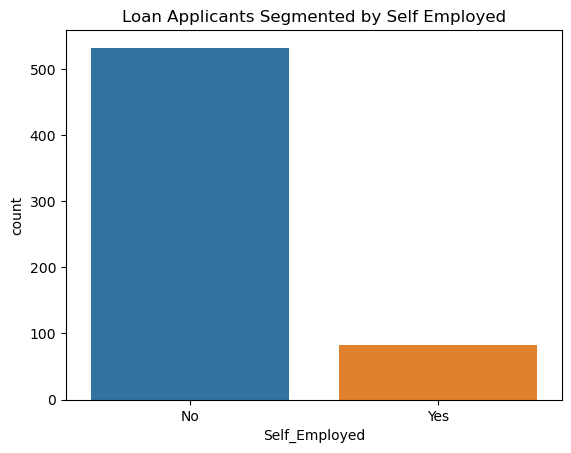

In [15]:
print('Loan Applicants Segmented by Self Employed')
print(loan_prediction['Self_Employed'].value_counts())

sns.countplot(x='Self_Employed',data=loan_prediction).set(title='Loan Applicants Segmented by Self Employed')

Loan Applicants Segmented by Credit History
1.0    525
0.0     89
Name: Credit_History, dtype: int64


[Text(0.5, 1.0, 'Loan Applicants Segmented by Credit History')]

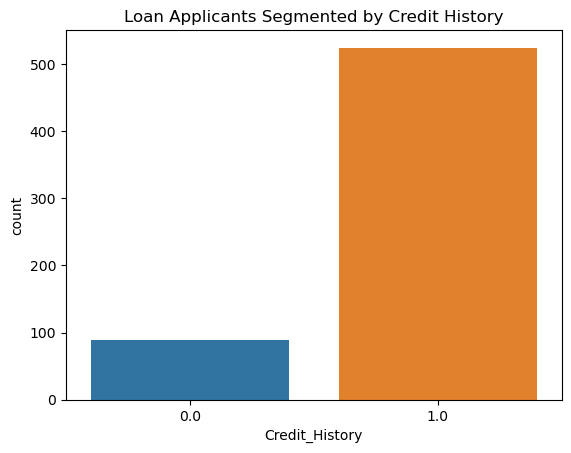

In [16]:
print('Loan Applicants Segmented by Credit History')
print(loan_prediction['Credit_History'].value_counts())

sns.countplot(x='Credit_History',data=loan_prediction).set(title='Loan Applicants Segmented by Credit History')

[Text(0.5, 1.0, 'Loan Applicants Segmented by Loan Amount')]

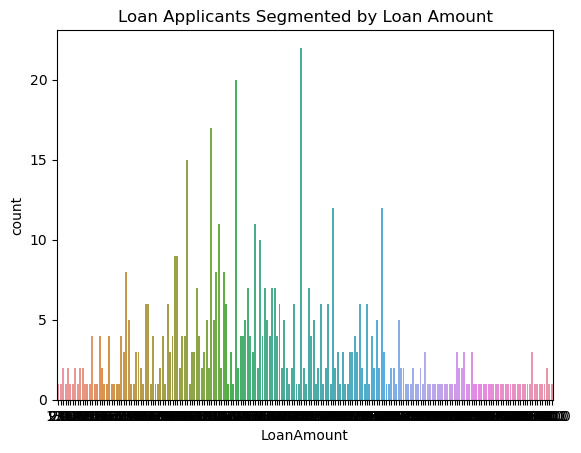

In [17]:
sns.countplot(x='LoanAmount',data=loan_prediction).set(title='Loan Applicants Segmented by Loan Amount')

### For model fitting we will need numerical data only, but here the Gender, Married, Dependents, Education, Self_Employed and Property_Area columns are not numerical.

### The categorical data has to be converted to numerical data.

In [18]:
#Converting gender to numeric data
loan_prediction_train = loan_prediction

Gender = pd.get_dummies(loan_prediction_train['Gender'],drop_first=True)
loan_prediction_train = pd.concat([loan_prediction_train,Gender],axis=1)

loan_prediction_train = loan_prediction_train.drop(['Gender'],axis=1)
loan_prediction_train.rename(columns={"Male": "Gender"}, inplace=True) #if value in column Gender is 1 it is Male and 0 is female

In [19]:
#Converting Married to numeric data

Married = pd.get_dummies(loan_prediction_train['Married'],drop_first=True)
loan_prediction_train = pd.concat([loan_prediction_train,Married],axis=1)

loan_prediction_train = loan_prediction_train.drop(['Married'],axis=1)
loan_prediction_train.rename(columns={"Yes": "Married"}, inplace=True) #if value in column Married is 1 it is Married and 0 is Unmarried

In [20]:
#Converting Education to numeric data

Education = pd.get_dummies(loan_prediction_train['Education'],drop_first=True)
loan_prediction_train = pd.concat([loan_prediction_train,Education],axis=1)

loan_prediction_train = loan_prediction_train.drop(['Education'],axis=1)
loan_prediction_train.rename(columns={"Not Graduate": "Education"}, inplace=True) #if value in column Education is 1 it is Not Graduate and 0 is graduate

In [21]:
#Converting Self_Employed to numeric data

Self_Employed = pd.get_dummies(loan_prediction_train['Self_Employed'],drop_first=True)
loan_prediction_train = pd.concat([loan_prediction_train,Self_Employed],axis=1)

loan_prediction_train = loan_prediction_train.drop(['Self_Employed'],axis=1)
loan_prediction_train.rename(columns={"Yes": "Self_Employed"}, inplace=True) #if value in column Self_Employed is 1 it is Self_Employed and 0 is Not Self_Employed

In [22]:
#Converting Property_Area to numeric data
loan_prediction_train = pd.get_dummies(loan_prediction_train, columns=['Property_Area'], prefix=['Property_Area'])


In [23]:
#Converting Dependents to numeric data

loan_prediction_train = pd.get_dummies(loan_prediction_train, columns=['Dependents'], prefix=['Dependents'])

In [24]:
loan_prediction_train['Loan_Status'] = loan_prediction_train['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)

<AxesSubplot:>

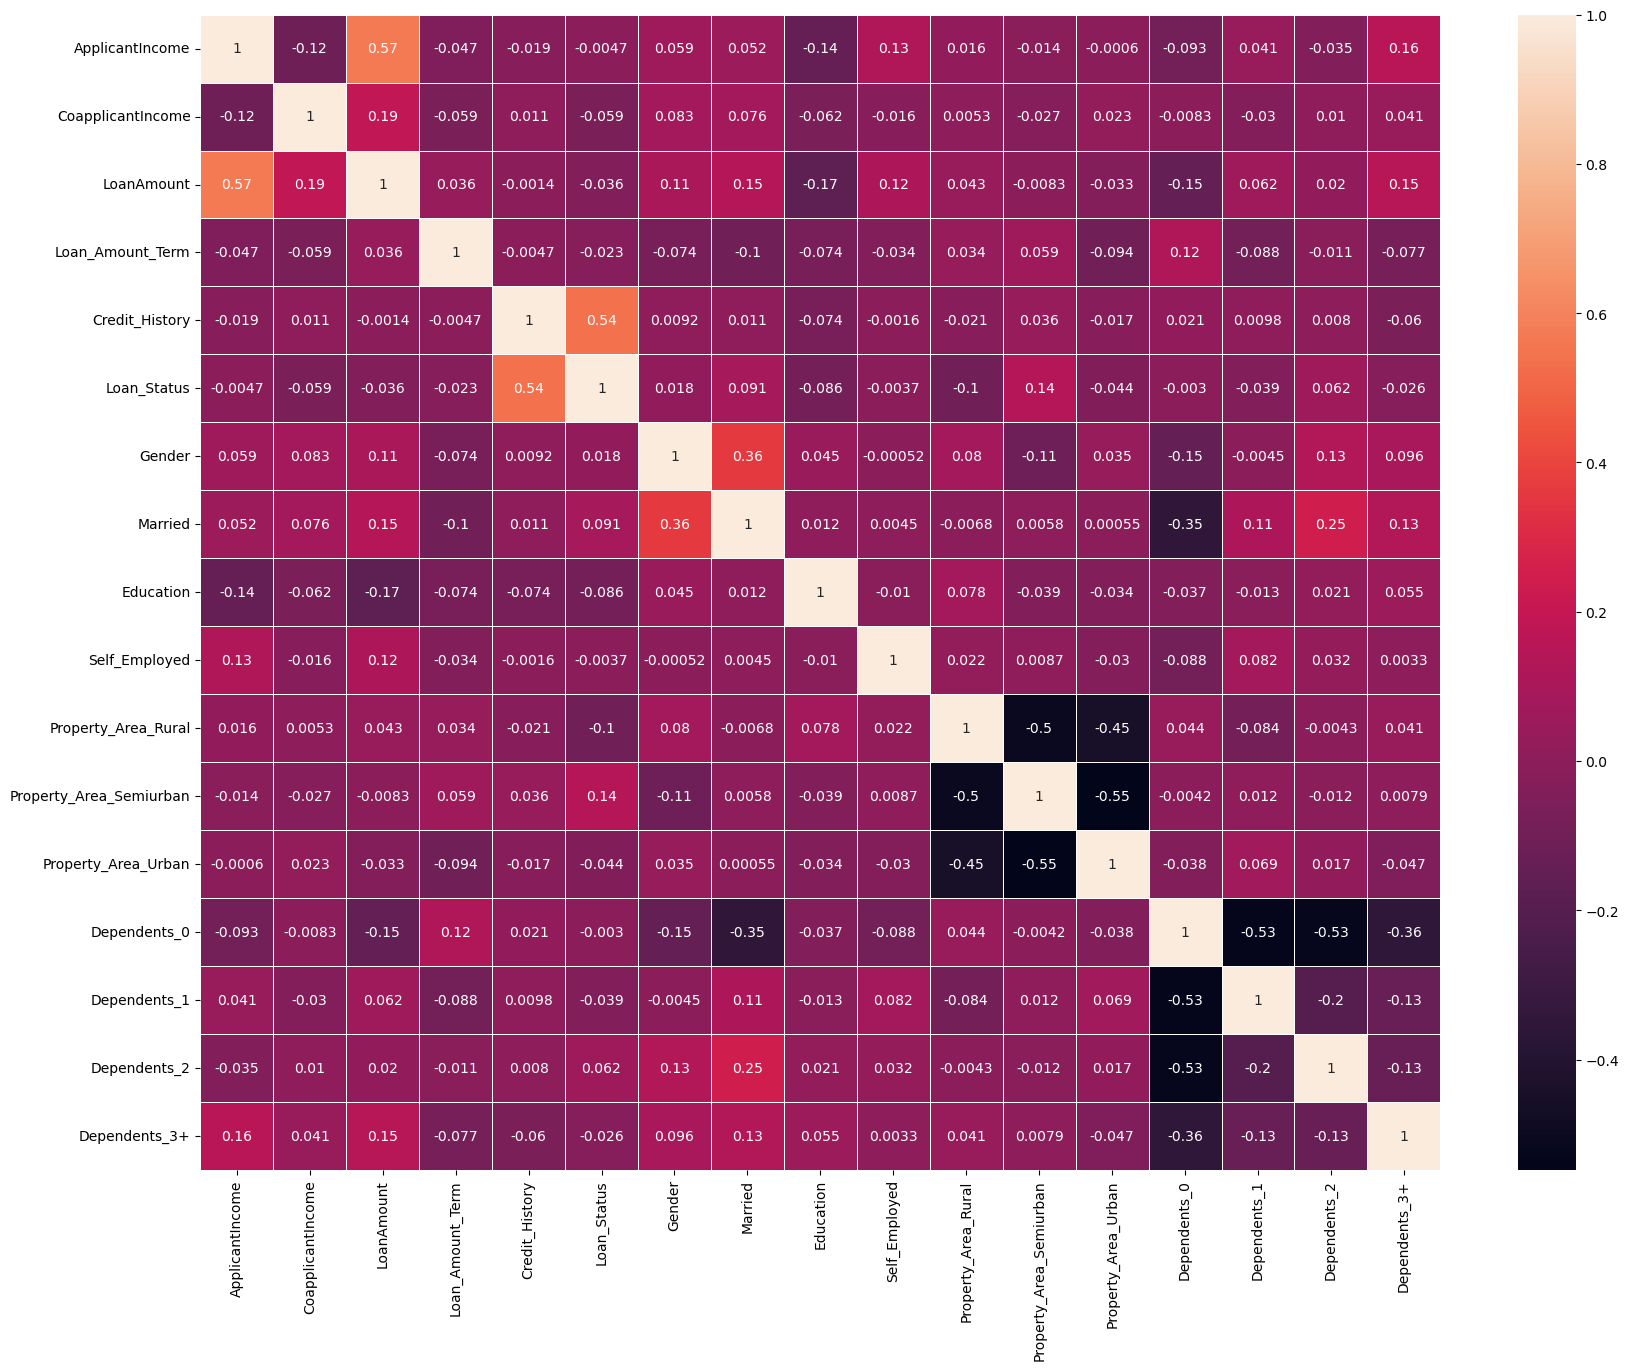

In [25]:
plt.figure(figsize=(20, 15))
sns.heatmap(loan_prediction_train.corr(), annot=True, linewidths=0.5)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [27]:
x = loan_prediction_train.drop(['Loan_Status','Loan_ID'],axis=1) #Independent data, dropping Loan_ID coulumn as well
y = loan_prediction_train['Loan_Status']#dependent data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)#split data into train and test

In [28]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

RFC_pred = RFC.predict(x_test)

print(classification_report(y_test, RFC_pred))

              precision    recall  f1-score   support

           0       0.62      0.45      0.53        33
           1       0.82      0.90      0.86        90

    accuracy                           0.78       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.77      0.78      0.77       123



In [29]:
from xgboost import XGBClassifier

XGBC = XGBClassifier()
XGBC.fit(x_train, y_train)

XGBC_pred = XGBC.predict(x_test)

print(classification_report(y_test, XGBC_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66        33
           1       0.88      0.87      0.87        90

    accuracy                           0.81       123
   macro avg       0.76      0.77      0.76       123
weighted avg       0.81      0.81      0.81       123



In [30]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()

nb_clf.fit(x_train, y_train)

nb_pred = nb_clf.predict(x_test)

print(classification_report(y_test, nb_pred))


              precision    recall  f1-score   support

           0       0.65      0.67      0.66        33
           1       0.88      0.87      0.87        90

    accuracy                           0.81       123
   macro avg       0.76      0.77      0.76       123
weighted avg       0.81      0.81      0.81       123



In [31]:
print("Accuracy of Random Forest Classifier is", accuracy_score(y_test, RFC_pred))
print("Accuracy of XGBoost is", accuracy_score(y_test, XGBC_pred))
print("Accuracy of Naive Bayes is", accuracy_score(y_test, nb_pred))

Accuracy of Random Forest Classifier is 0.7804878048780488
Accuracy of XGBoost is 0.8130081300813008
Accuracy of Naive Bayes is 0.8292682926829268


### Since Naive Bayes has the highest Accuracy Score we will use this model to predict the test data

In [32]:
loan_prediction_test =pd.read_csv('/Users/adityaradhakrishnan/Desktop/CodeClause/Loan Prediction Problem/Loan Prediction Problem Dataset/test_Y3wMUE5_7gLdaTN.csv')

loan_prediction_test = loan_prediction_test.drop('Loan_ID',axis=1)

In [33]:
#Filling null values


#replacing null values in Gender, Married, Self Employed, Dependents, Credit history and Loan Amount Term with mode
loan_prediction_test['Gender'].fillna(loan_prediction_test['Gender'].mode()[0],inplace=True)
loan_prediction_test['Married'].fillna(loan_prediction_test['Married'].mode()[0],inplace=True)
loan_prediction_test['Self_Employed'].fillna(loan_prediction_test['Self_Employed'].mode()[0],inplace=True)
loan_prediction_test['Dependents'].fillna(loan_prediction_test['Dependents'].mode()[0],inplace=True)
loan_prediction_test['Credit_History'].fillna(loan_prediction_test['Credit_History'].mode()[0],inplace=True)
loan_prediction_test['Loan_Amount_Term'].fillna(loan_prediction_test['Loan_Amount_Term'].mode()[0],inplace=True)

#replacing null values in LoanAmount with mean
loan_prediction_test['LoanAmount'].fillna(loan_prediction_test['LoanAmount'].mean(),inplace=True)

In [34]:
#Converting categorical to numeric for test data

Gender_test = pd.get_dummies(loan_prediction_test['Gender'],drop_first=True)
loan_prediction_test = pd.concat([loan_prediction_test,Gender_test],axis=1)

loan_prediction_test = loan_prediction_test.drop(['Gender'],axis=1)
loan_prediction_test.rename(columns={"Male": "Gender"}, inplace=True)

Married_test = pd.get_dummies(loan_prediction_test['Married'],drop_first=True)
loan_prediction_test = pd.concat([loan_prediction_test,Married_test],axis=1)

loan_prediction_test = loan_prediction_test.drop(['Married'],axis=1)
loan_prediction_test.rename(columns={"Yes": "Married"}, inplace=True)

Education_test = pd.get_dummies(loan_prediction_test['Education'],drop_first=True)
loan_prediction_test = pd.concat([loan_prediction_test,Education_test],axis=1)

loan_prediction_test = loan_prediction_test.drop(['Education'],axis=1)
loan_prediction_test.rename(columns={"Not Graduate": "Education"}, inplace=True)

Self_Employed_test = pd.get_dummies(loan_prediction_test['Self_Employed'],drop_first=True)
loan_prediction_test = pd.concat([loan_prediction_test,Self_Employed_test],axis=1)

loan_prediction_test = loan_prediction_test.drop(['Self_Employed'],axis=1)
loan_prediction_test.rename(columns={"Yes": "Self_Employed"}, inplace=True)

loan_prediction_test = pd.get_dummies(loan_prediction_test, columns=['Property_Area'], prefix=['Property_Area'])

loan_prediction_test = pd.get_dummies(loan_prediction_test, columns=['Dependents'], prefix=['Dependents'])


In [35]:
nb_pred_test_data = nb_clf.predict(loan_prediction_test)

In [36]:
print(nb_pred_test_data)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [37]:
Predicted = pd.DataFrame(nb_pred_test_data, columns=['Predicted Loan Status'])

# Concatenate the new DataFrame to the original test data
loan_prediction_test = pd.concat([loan_prediction_test, Predicted], axis=1)

# Print the updated DataFrame
loan_prediction_test.head(10)

#Predicted Loan Status 1 Loan is approved and 0 not approved

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Predicted Loan Status
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,1,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,0,0,0,0,1,0,1,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,0,0,0,1,0,0,1,0,1
3,2340,2546,100.0,360.0,1.0,1,1,0,0,0,0,1,0,0,1,0,1
4,3276,0,78.0,360.0,1.0,1,0,1,0,0,0,1,1,0,0,0,1
5,2165,3422,152.0,360.0,1.0,1,1,1,1,0,0,1,1,0,0,0,1
6,2226,0,59.0,360.0,1.0,0,0,1,0,0,1,0,0,1,0,0,1
7,3881,0,147.0,360.0,0.0,1,1,1,0,1,0,0,0,0,1,0,0
8,13633,0,280.0,240.0,1.0,1,1,0,0,0,0,1,0,0,1,0,1
9,2400,2400,123.0,360.0,1.0,1,0,1,0,0,1,0,1,0,0,0,1


Predicted Loan Status
1    301
0     66
Name: Predicted Loan Status, dtype: int64


[Text(0.5, 1.0, 'Predicted Loan Status')]

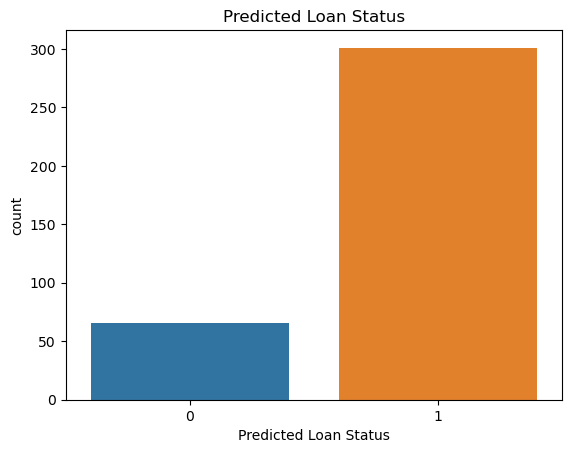

In [38]:
print('Predicted Loan Status')
print(loan_prediction_test['Predicted Loan Status'].value_counts())

sns.countplot(x='Predicted Loan Status',data=loan_prediction_test).set(title='Predicted Loan Status')